# OkCupid Cleaning and EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re

In [3]:
okcupid = pd.read_csv("okcupid_profiles.csv")
okcupid.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
okcupid.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [5]:
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [6]:
okcupid.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

### Handling Outliers

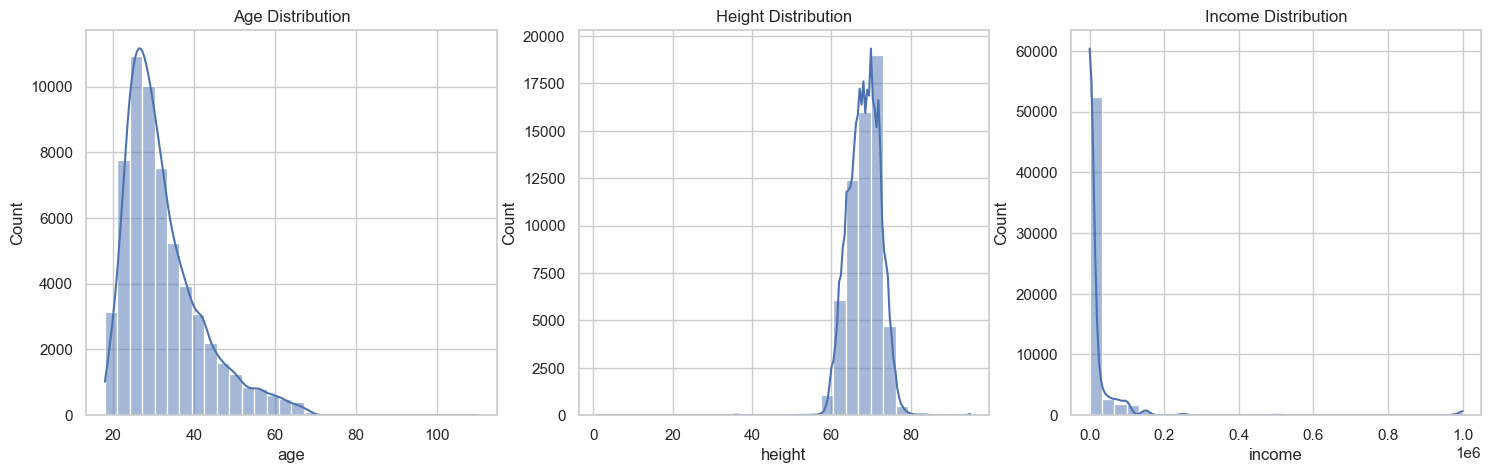

In [8]:
sns.set(style="whitegrid")

# histgrams of numerical data to check distribution

fig,axes = plt.subplots(1,3,figsize=(18,5))

sns.histplot(okcupid["age"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(okcupid["height"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Height Distribution")

sns.histplot(okcupid["income"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Income Distribution")

plt.show()

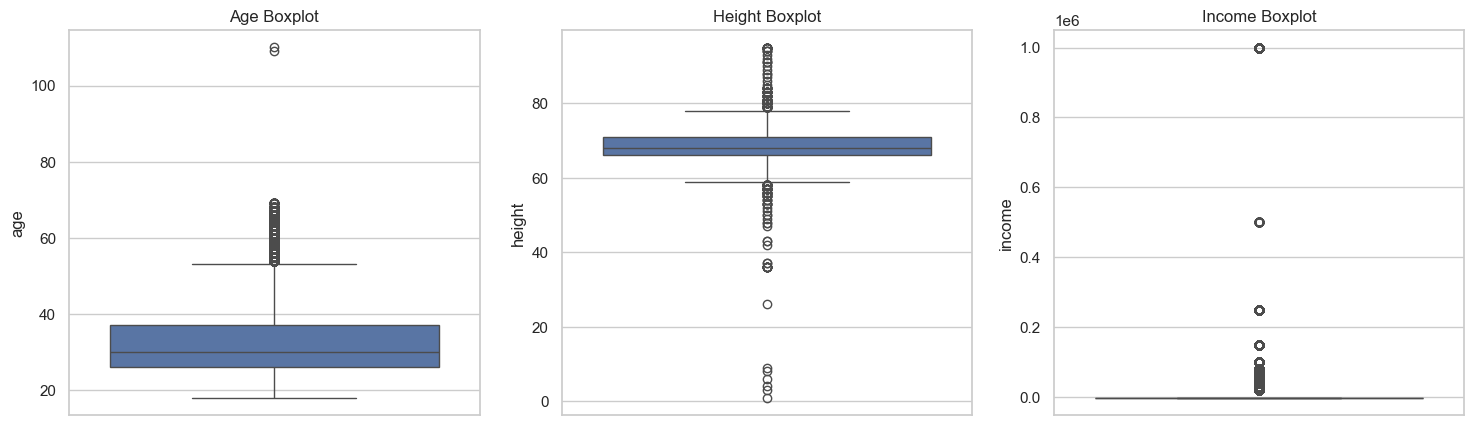

In [9]:
# box plots to identify outliers

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=okcupid["age"], ax=axes[0])
axes[0].set_title("Age Boxplot")

sns.boxplot(y=okcupid["height"], ax=axes[1])
axes[1].set_title("Height Boxplot")

sns.boxplot(y=okcupid["income"], ax=axes[2])
axes[2].set_title("Income Boxplot")

plt.show()

**Oberservations:**
- Age: Most values show between 18-70, but some values go up past 100. We will cap ages under 80
- Height: The majority of values seem to be in the 50-75 inches range. There are some near 0 and over 90. We will remove unrealistic heights (below 50 and above 84
- Income: Many of the income values are below are -1, representing unknown or missing income. As well as income at 1,000,000. We'll replace -1 with NaN values and cap extreme values above $300,000

In [11]:
okcupid_1 = okcupid.copy()

okcupid_1 = okcupid_1[(okcupid_1["age"] >= 18) & (okcupid_1["age"] <= 80)] # remove unrealistic ages

okcupid_1 = okcupid_1[(okcupid_1["height"] >= 50) & (okcupid_1["height"] <= 84)] # cap height between 50 and 84 inches

import numpy as np

# Replace -1 with NaN (missing value)
okcupid_1["income"] = okcupid_1["income"].replace(-1, np.nan)

# Remove extreme values (income > $300,000)
okcupid_1 = okcupid_1[okcupid_1["income"] <= 300000]

In [12]:
# verify 

print(okcupid_1.describe())
print(okcupid_1.isnull().sum())

                age        height         income
count  10924.000000  10924.000000   10924.000000
mean      32.633376     69.071677   59982.607104
std        9.822711      3.737874   42501.322548
min       18.000000     53.000000   20000.000000
25%       26.000000     67.000000   20000.000000
50%       30.000000     69.000000   50000.000000
75%       38.000000     72.000000   80000.000000
max       69.000000     84.000000  250000.000000
age               0
status            0
sex               0
orientation       0
body_type       533
diet           3875
drinks          199
drugs          1677
education       686
ethnicity       650
height            0
income            0
job             296
last_online       0
location          0
offspring      5542
pets           2664
religion       2352
sign           1271
smokes          473
speaks            5
essay0          866
essay1         1176
essay2         1472
essay3         1736
essay4         1825
essay5         1859
essay6         2214

**Lets move onto the missing values in the categorical columns**

In [14]:
cat_cols = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
            'drugs', 'education', 'ethnicity', 'job', 'location', 'offspring', 
            'pets', 'religion', 'sign', 'smokes', 'speaks']  #list of categorical columns

cat_missing = okcupid_1[cat_cols].isnull().sum()

cat_missing

status            0
sex               0
orientation       0
body_type       533
diet           3875
drinks          199
drugs          1677
education       686
ethnicity       650
job             296
location          0
offspring      5542
pets           2664
religion       2352
sign           1271
smokes          473
speaks            5
dtype: int64

**Strategy:**
- Use mode imputation for following columns: "body_type", "drinks", "drugs", "smokes", "speaks"
- Fill following columns with "unknown" : "diet", "education", "ethnicity", "job", "pets", "religion", "sign"
- Drop offspring columns since there are too many missing values

In [16]:
# Fill with mode (most frequent value)

for col in ["body_type", "drinks", "drugs", "smokes", "speaks"]:
    okcupid_1[col].fillna(okcupid_1[col].mode()[0], inplace=True)

# Fill with "unknown"

for col in ["diet", "education", "ethnicity", "job", "pets", "religion", "sign"]:
    okcupid_1[col].fillna("unknown", inplace=True)

# Drop offspring column since too many missing values

okcupid_1.drop(columns=["offspring"], inplace=True)

# Verify 
print(okcupid_1.isnull().sum())

age               0
status            0
sex               0
orientation       0
body_type         0
diet              0
drinks            0
drugs             0
education         0
ethnicity         0
height            0
income            0
job               0
last_online       0
location          0
pets              0
religion          0
sign              0
smokes            0
speaks            0
essay0          866
essay1         1176
essay2         1472
essay3         1736
essay4         1825
essay5         1859
essay6         2214
essay7         1952
essay8         2967
essay9         1948
dtype: int64


C:\Users\samue\AppData\Local\Temp\ipykernel_44652\2641271435.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid_1[col].fillna(okcupid_1[col].mode()[0], inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_44652\2641271435.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

**Finally, lets proceed with cleaning up the essay columns.**
- many users failed to put a response in the essay column, but since we may need text analysis later, we may have to keep these columns
- Before making any changes, we will analyze further below

In [18]:
essay_cols = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]

missing_essays = okcupid_1[essay_cols].isnull().sum() # show the missing values for only essay columns
missing_essays

essay0     866
essay1    1176
essay2    1472
essay3    1736
essay4    1825
essay5    1859
essay6    2214
essay7    1952
essay8    2967
essay9    1948
dtype: int64

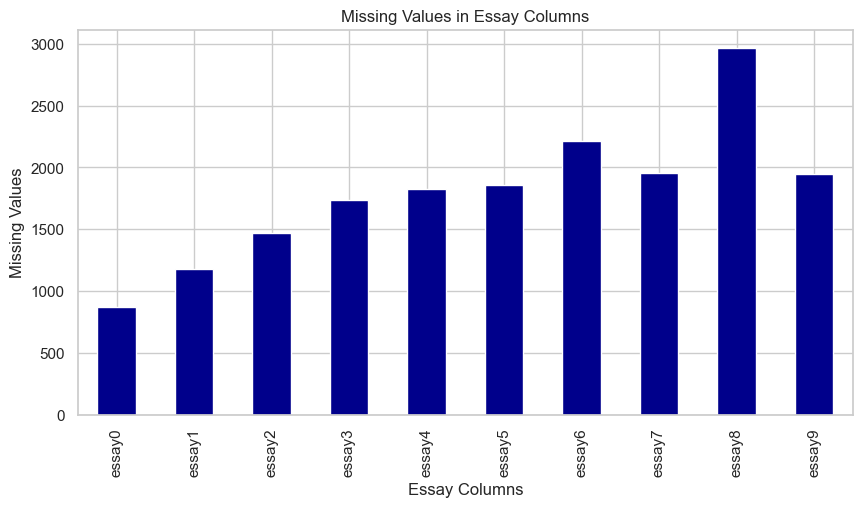

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
missing_essays.plot(kind="bar",color="darkblue")
plt.xlabel("Essay Columns")
plt.ylabel("Missing Values")
plt.title("Missing Values in Essay Columns")
plt.show()

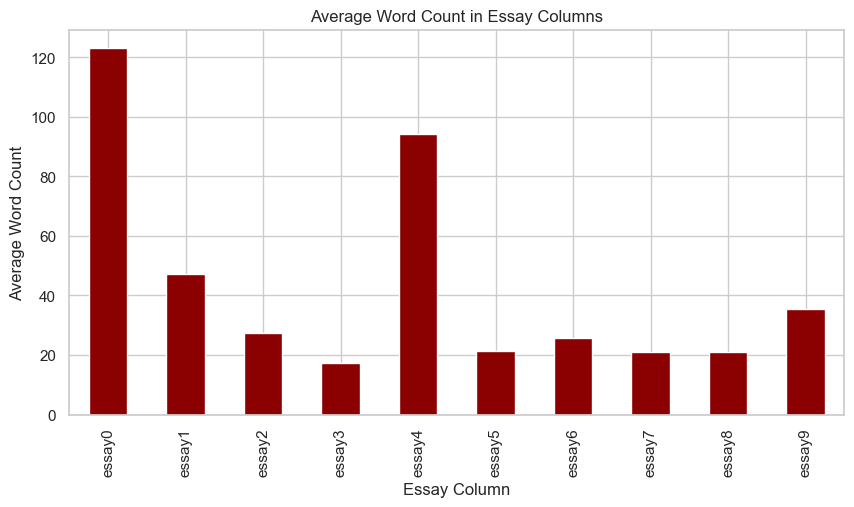

In [20]:
# Calculating the average word count for each essay column

essay_lengths = okcupid_1[essay_cols].apply(lambda x: x.dropna().str.split().str.len().mean())

# Plotting essay length distribution
plt.figure(figsize=(10,5))
essay_lengths.plot(kind="bar", color="darkred")
plt.xlabel("Essay Column")
plt.ylabel("Average Word Count")
plt.title("Average Word Count in Essay Columns")
plt.show()

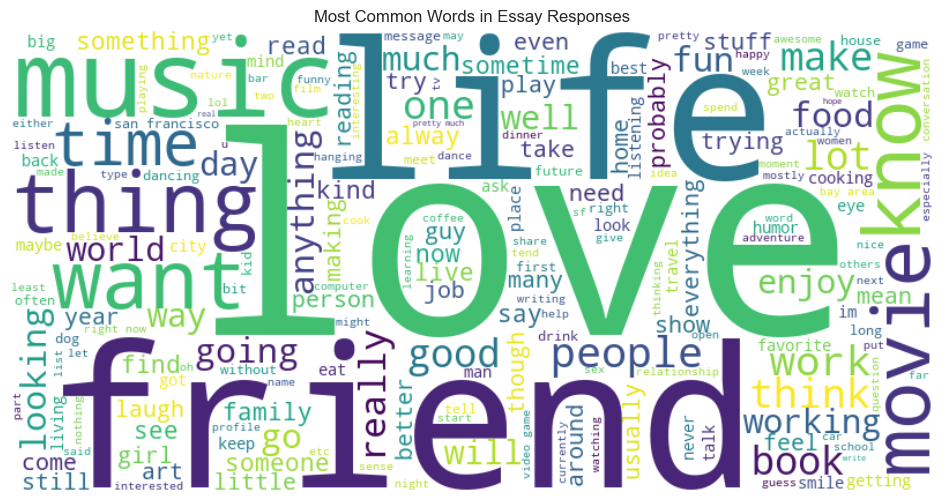

In [21]:
# Combine all essays into a single text
all_essays = " ".join(okcupid_1[essay_cols].dropna().values.flatten())

# Count most common words (excluding stopwords)
word_counts = Counter(all_essays.split())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_essays)

# Show the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Essay Responses")
plt.show()

**Strategy:**
- We'll handle missing essay responses by filling them with "unknown"
- We'll combinee all the essays into a single columns by concat all essay responses
- We'll create a word count feature that counts the number of words in the essays

In [23]:
# filling in missing essay responses with unknown

okcupid_1[essay_cols] = okcupid_1[essay_cols].fillna("unknown")

# combining all essays into a single columns

okcupid_1["all_essays"]= okcupid_1[essay_cols].apply(lambda x: " ".join(x), axis=1)

# creating the word count feature

okcupid_1["word_count"]= okcupid_1["all_essays"].apply(lambda x: len(x.split()))

In [24]:
print(okcupid_1[essay_cols].isnull().sum())

essay0    0
essay1    0
essay2    0
essay3    0
essay4    0
essay5    0
essay6    0
essay7    0
essay8    0
essay9    0
dtype: int64


In [25]:
print(okcupid_1[["word_count"]].describe())

         word_count
count  10924.000000
mean     373.818382
std      326.183879
min       10.000000
25%      160.000000
50%      306.000000
75%      501.000000
max    10602.000000


In [26]:
print(okcupid_1[["all_essays"]].head())

                                           all_essays
1   i am a chef: this is what that means. 1. i am ...
3   i work in a library and go to school. . . read...
11  i was born in wisconsin, grew up in iowa, and ...
13  unknown unknown unknown unknown unknown unknow...
14  unknown i have an awesome career working as a ...


In [27]:
print(okcupid_1[["all_essays", "word_count"]].sample(5))

                                              all_essays  word_count
46275  hello. i'm new to the bay area and am apprecia...         307
5240   i am a very positive person who loves to laugh...         164
36236  i like people who are nice, honest, funny/sarc...         310
52963  i am friendly, funny, warm and honest. i love ...         720
2387   are you smarter than a 27-year old?  why do i ...         450


**There may be outliers on word count given the max of 10602. lets analyze it with a histogram visual**

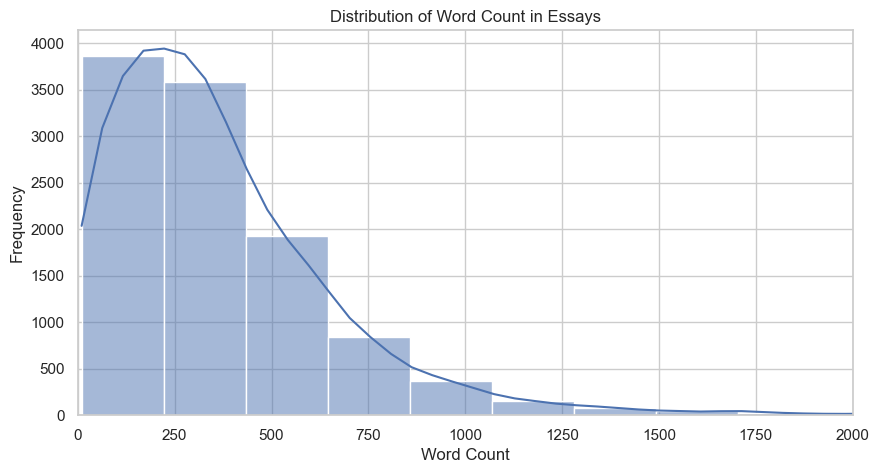

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(okcupid_1["word_count"], bins=50, kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count in Essays")
plt.xlim(0, 2000)  # Cap to remove extreme outliers
plt.show()

**We'll keep as is for right now. If models struggle with word count later down the line, we can revist**

In [31]:
okcupid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10924 entries, 1 to 59943
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10924 non-null  int64  
 1   status       10924 non-null  object 
 2   sex          10924 non-null  object 
 3   orientation  10924 non-null  object 
 4   body_type    10924 non-null  object 
 5   diet         10924 non-null  object 
 6   drinks       10924 non-null  object 
 7   drugs        10924 non-null  object 
 8   education    10924 non-null  object 
 9   ethnicity    10924 non-null  object 
 10  height       10924 non-null  float64
 11  income       10924 non-null  float64
 12  job          10924 non-null  object 
 13  last_online  10924 non-null  object 
 14  location     10924 non-null  object 
 15  pets         10924 non-null  object 
 16  religion     10924 non-null  object 
 17  sign         10924 non-null  object 
 18  smokes       10924 non-null  object 
 19  speaks   

In [32]:
okcupid_1.isnull().sum()

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
pets           0
religion       0
sign           0
smokes         0
speaks         0
essay0         0
essay1         0
essay2         0
essay3         0
essay4         0
essay5         0
essay6         0
essay7         0
essay8         0
essay9         0
all_essays     0
word_count     0
dtype: int64

**After browsing the cleaned dataset, there are still some updates that need to be made**
- Remove all Essays from 0 to 9 since we have the all essay column now
- In all essay column, there are multiple repeats of the word unknown due to missing responses, i think we should remove these to avoid skewing of data later
- under the sign column, there appears to be text distortion (For example: pisces but it doesn&rsquo;t matter or aries and it&rsquo;s fun to think about) we will remove extra wording and only keep the actual sign
- Drop unnesscary columns: "last_online" , "location"
- There are two rows where there are data in each column but it appears that an essay was copied over each of these features and they need to be removed

In [34]:
# dropping essay columns

okcupid_1.drop(columns=essay_cols, inplace=True)

# drop unnecessary columns

okcupid_1.drop(columns=["last_online", "location"], inplace=True)

# replace multiple unknowns with single unknown

okcupid_1["all_essays"] = okcupid_1["all_essays"].apply(lambda x: re.sub(r"(unknown\s*)+", "unknown", x.strip()))


# Extract only the zodiac sign (first word) and remove any additional text
okcupid_1["sign"] = okcupid_1["sign"].apply(lambda x: re.match(r"^\w+", x).group() if pd.notnull(x) else x)

# Verify
print(okcupid_1["sign"].unique())

for val in okcupid_1["status"].unique():
    print(repr(val))

['cancer' 'pisces' 'leo' 'unknown' 'taurus' 'gemini' 'virgo' 'libra'
 'capricorn' 'aries' 'scorpio' 'sagittarius' 'aquarius']
'single'
'seeing someone'
'available'
'married'
'unknown'


In [35]:
print(okcupid_1.dtypes) # verifying data types

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income         float64
job             object
pets            object
religion        object
sign            object
smokes          object
speaks          object
all_essays      object
word_count       int64
dtype: object


In [36]:
print(okcupid_1["income"].value_counts().sort_index()) # checking for missing values in income or placeholders such as -1

income
20000.0     2947
30000.0     1047
40000.0     1005
50000.0      974
60000.0      736
70000.0      707
80000.0     1110
100000.0    1621
150000.0     628
250000.0     149
Name: count, dtype: int64


In [37]:
okcupid_1["word_count"] = okcupid_1["word_count"].astype(int) # converting wordcount to int

In [38]:
okcupid_1["word_count"] = okcupid_1["word_count"].astype(int) # convert wordcount to integer
print(okcupid_1.dtypes)

# checking for duplicates

print(okcupid_1.duplicated().sum())  # Count of duplicate rows

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income         float64
job             object
pets            object
religion        object
sign            object
smokes          object
speaks          object
all_essays      object
word_count       int64
dtype: object
0


In [39]:
print(okcupid_1["sign"].value_counts()) # check unique values and counts of sign

# lets replace unknown signs with Nan so models can handle it better

okcupid_1["sign"].replace("unknown", np.nan, inplace=True)
print(okcupid_1["sign"].value_counts())

for col in okcupid_1.select_dtypes(include=["object"]).columns: # check for rest of unknowns
    print(f"Column: {col}")
    print(okcupid_1[col].value_counts())
    print("\n" + "-"*50 + "\n")

sign
unknown        1271
gemini          887
cancer          863
scorpio         863
leo             860
libra           837
taurus          822
virgo           812
pisces          769
aries           750
sagittarius     747
aquarius        745
capricorn       698
Name: count, dtype: int64
sign
gemini         887
cancer         863
scorpio        863
leo            860
libra          837
taurus         822
virgo          812
pisces         769
aries          750
sagittarius    747
aquarius       745
capricorn      698
Name: count, dtype: int64
Column: status
status
single            9945
seeing someone     456
available          438
married             83
unknown              2
Name: count, dtype: int64

--------------------------------------------------

Column: sex
sex
m    7943
f    2981
Name: count, dtype: int64

--------------------------------------------------

Column: orientation
orientation
straight    9577
gay          776
bisexual     571
Name: count, dtype: int64

---------

C:\Users\samue\AppData\Local\Temp\ipykernel_44652\1175040462.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid_1["sign"].replace("unknown", np.nan, inplace=True)


**Strategy for the Unknowns for each colums:**
- status	Only 2 "unknown" values → Drop these rows
- diet	Large number of "unknown" values → Replace with NaN
- education	Replace "unknown" with NaN
- ethnicity	Replace "unknown" with NaN
- job	Replace "unknown" with NaN
- pets	Replace "unknown" with NaN
- religion	Replace "unknown" with NaN

In [41]:
# Drop rows where status is unknown (since there are only 2)
okcupid_1 = okcupid_1[okcupid_1["status"] != "unknown"]

# Replace "unknown" with NaN in multiple columns
cols_to_replace = ["diet", "education", "ethnicity", "job", "pets", "religion"]
okcupid_1[cols_to_replace] = okcupid_1[cols_to_replace].replace("unknown", np.nan)

# we are going to replace the final missing NaN values with the mode as an imputation method

# List of columns to replace
cols_to_replace = ["diet", "education", "ethnicity", "job", "pets", "religion", "sign"]

# Fill NaN values with the most common category (mode) in each column
for col in cols_to_replace:
    okcupid_1[col].fillna(okcupid_1[col].mode()[0], inplace=True)

# Verify 
print(okcupid_1.isnull().sum())  # Check remaining NaN values

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
pets           0
religion       0
sign           0
smokes         0
speaks         0
all_essays     0
word_count     0
dtype: int64


C:\Users\samue\AppData\Local\Temp\ipykernel_44652\757053714.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid_1[col].fillna(okcupid_1[col].mode()[0], inplace=True)


In [42]:
# See unique values for speaks
print(okcupid_1['speaks'].unique()[:20])  # Adjust [:20] if you want to see more

['english (fluently), spanish (poorly), french (poorly)'
 'english, german (poorly)' 'english (fluently), sign language (poorly)'
 'english' 'english (okay), french (poorly), spanish (poorly), c++ (okay)'
 'english (fluently)' 'english (poorly), spanish (poorly)'
 'english (fluently), hindi (okay), spanish (poorly), french (poorly), sanskrit (poorly)'
 'english, other (poorly)' 'english (fluently), french (okay)'
 'english (fluently), english'
 'english (fluently), croatian (fluently), bengali (okay)'
 'english (fluently), spanish (fluently), french (poorly), portuguese (poorly)'
 'english, hindi (okay), spanish (poorly)'
 'english (fluently), spanish (okay), french (poorly), czech (poorly)'
 'english, french, spanish (poorly)' 'english (fluently), german (okay)'
 'english (fluently), spanish (okay)' 'english (okay), c++ (poorly)'
 'english, english']


In [43]:
# Define someone as multilingual if they list more than one language (i.e., more than one comma)
okcupid_1['multilingual'] = okcupid_1['speaks'].apply(lambda x: len(x.split(',')) > 1)

okcupid_1.drop(columns=['speaks'], inplace=True)

print(okcupid_1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10922 entries, 1 to 59943
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           10922 non-null  int64  
 1   status        10922 non-null  object 
 2   sex           10922 non-null  object 
 3   orientation   10922 non-null  object 
 4   body_type     10922 non-null  object 
 5   diet          10922 non-null  object 
 6   drinks        10922 non-null  object 
 7   drugs         10922 non-null  object 
 8   education     10922 non-null  object 
 9   ethnicity     10922 non-null  object 
 10  height        10922 non-null  float64
 11  income        10922 non-null  float64
 12  job           10922 non-null  object 
 13  pets          10922 non-null  object 
 14  religion      10922 non-null  object 
 15  sign          10922 non-null  object 
 16  smokes        10922 non-null  object 
 17  all_essays    10922 non-null  object 
 18  word_count    10922 non-null  i

In [44]:
okcupid_1.to_csv("okcupid_cleaned.csv", index=False)